In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
airline_tweets = pd.read_csv('/content/drive/MyDrive/Tweets.csv')
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: ylabel='airline'>

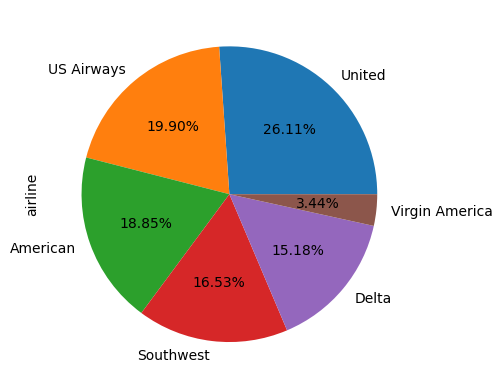

In [ ]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='airline_sentiment'>

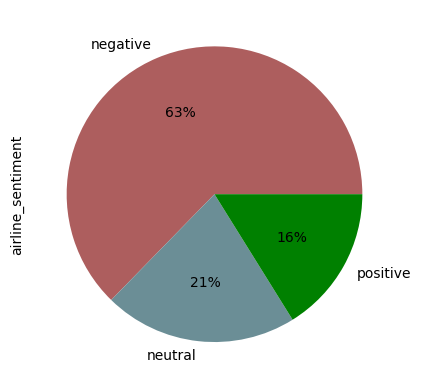

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["#ad5e5e", "#6b8e96", "green"])

<Axes: xlabel='airline'>

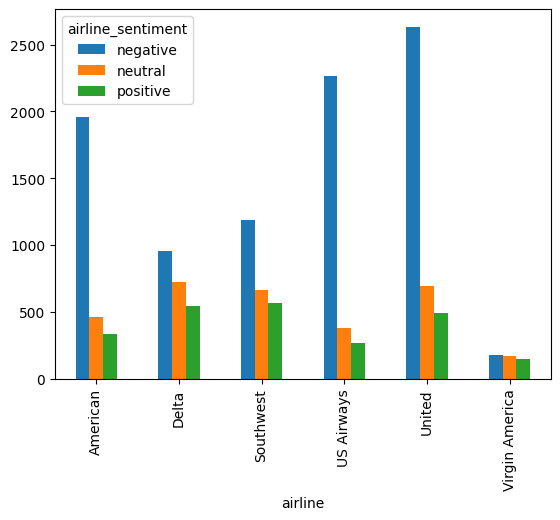

In [ ]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

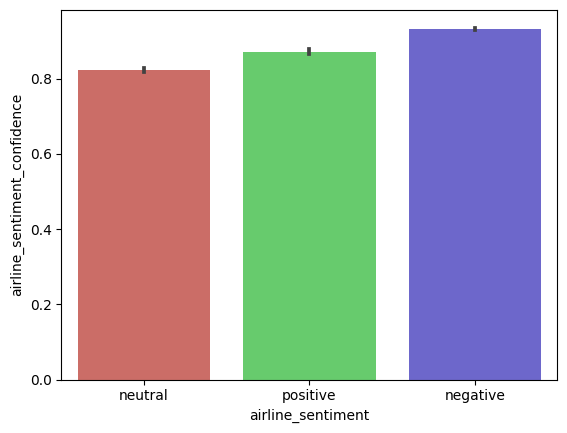

In [ ]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets,palette='hls')

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    '''
    return re.sub(r'@\w+', '', input_text)

In [ ]:
def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)

In [ ]:
positive_df = df[df['airline_sentiment'] == 'positive']
negative_df = df[df['airline_sentiment'] == 'negative']
neutral_df = df[df['airline_sentiment'] == 'neutral']



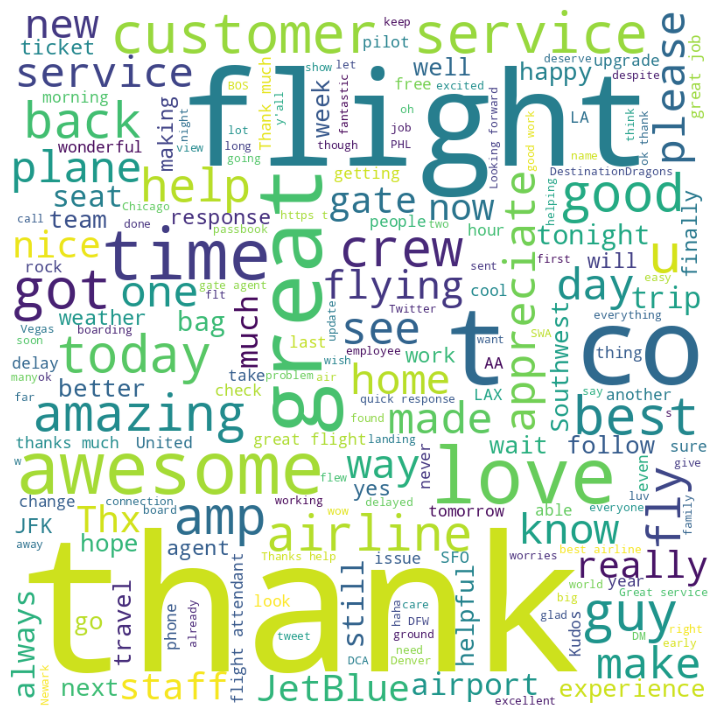

In [ ]:
positive_text = ' '.join(positive_df['text'].tolist())
positive_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)
plt.figure(figsize=(7, 8), facecolor=None)
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

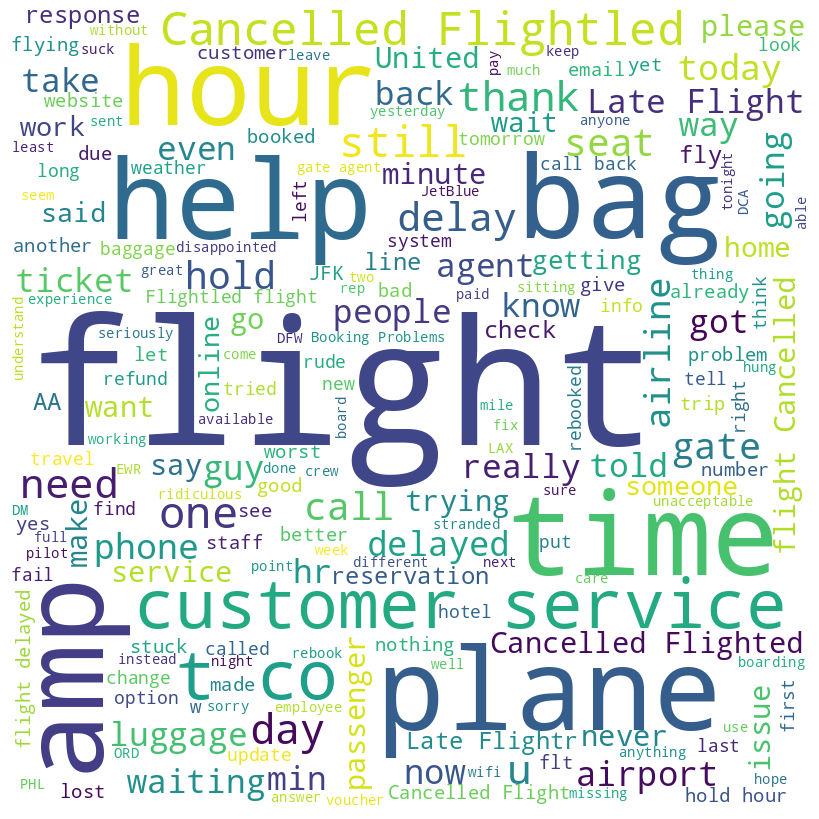

In [ ]:
negative_text = ' '.join(negative_df['text'].tolist())
negative_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

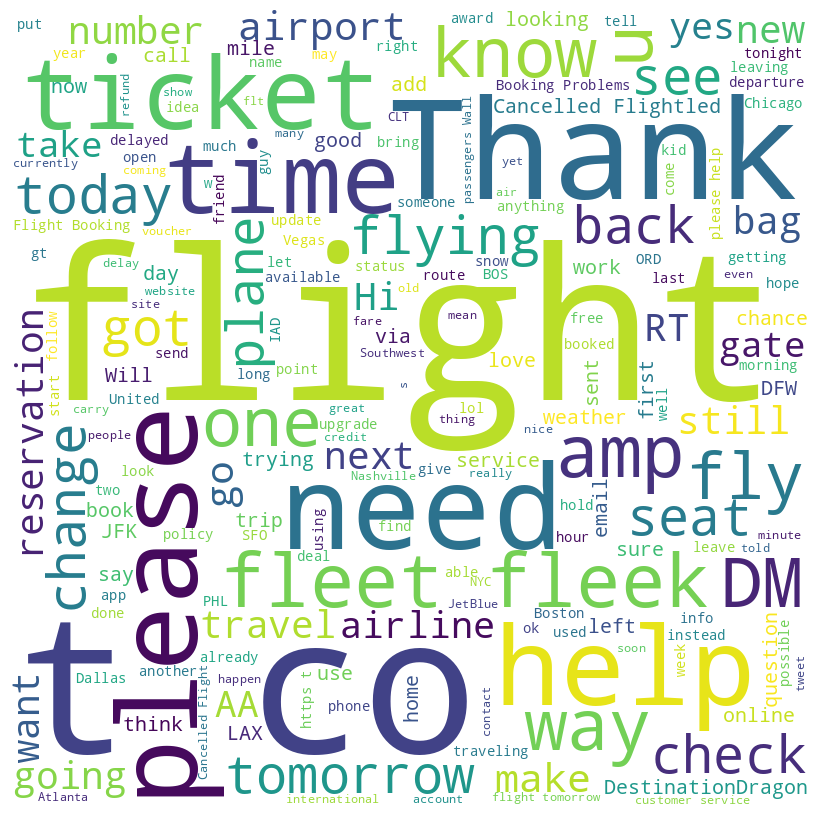

In [ ]:
neutral_text = ' '.join(neutral_df['text'].tolist())
neutral_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(neutral_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(neutral_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df.head()

,text,airline_sentiment
13031,another airline that's accommodating customer...,negative
14589,I've trying hours get hold someone.,negative
6186,"Denver Phoenix, think we're finally getting r...",neutral
2530,": ""Left gate minutes early."" My thoughts: ""Tha...",negative
4135,"missed it. Incoming time, Sat 30, no jetbridg...",negative


In [ ]:
df.shape

(14640, 2)

In [ ]:
# Count number of each type of tweet
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)

print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
import collections
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary

MAX_LEN = 30  # Maximum number of words in a sequence

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~\t\n',
               lower=True,
               char_level=False,
               split=' ')
tk.fit_on_texts(X_train)

In [ ]:
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('flight', 3552), ('not', 1431), ('no', 1360), ('get', 1196), ('t', 1097)]


In [ ]:
X_train_oh = tk.texts_to_matrix(X_train, mode='count')
X_test_oh = tk.texts_to_matrix(X_test, mode='count')

In [ ]:

def eval_metric(model, history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, NB_START_EPOCHS + 1)
    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    model.fit(X_train, y_train, epochs=epoch_stop, batch_size=BATCH_SIZE, verbose=1)
    results = model.evaluate(X_test, y_test)
    print()
    print('Test accuracy: {0:.2f}%'.format(results[1]*100))
    return results

def deep_model(model, X_train, y_train, X_valid, y_valid):
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=NB_START_EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=1)
    return history

def optimal_epoch(model_hist):
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    print("Minimum validation loss reached in epoch {}".format(min_epoch))
    return min_epoch

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object and fit on the training labels
le = LabelEncoder()
le.fit(y_train)

# Convert the training and test labels to numerical form
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

# Get the list of classes from the label encoder object
classes = list(le.classes_)

# Convert the numerical labels to one-hot encoded form
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train_le, num_classes=len(classes))
y_test_oh = to_categorical(y_test_le, num_classes=len(classes))

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:', X_valid.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

BATCH_SIZE = 512
NB_START_EPOCHS = 20



Shape of validation set: (1318, 10000)


Epoch 1/20
24/24 [==============================] - 2s 65ms/step - loss: 0.9004 - accuracy: 0.6087 - val_loss: 0.7255 - val_accuracy: 0.6737
Epoch 2/20
24/24 [==============================] - 1s 50ms/step - loss: 0.6570 - accuracy: 0.7170 - val_loss: 0.5870 - val_accuracy: 0.7678
Epoch 3/20
24/24 [==============================] - 1s 56ms/step - loss: 0.5066 - accuracy: 0.8205 - val_loss: 0.5261 - val_accuracy: 0.7982
Epoch 4/20
24/24 [==============================] - 2s 87ms/step - loss: 0.4091 - accuracy: 0.8553 - val_loss: 0.4933 - val_accuracy: 0.8103
Epoch 5/20
24/24 [==============================] - 2s 95ms/step - loss: 0.3410 - accuracy: 0.8791 - val_loss: 0.5056 - val_accuracy: 0.7891
Epoch 6/20
24/24 [==============================] - 3s 122ms/step - loss: 0.2901 - accuracy: 0.9001 - val_loss: 0.5043 - val_accuracy: 0.7944
Epoch 7/20
24/24 [==============================] - 2s 95ms/step - loss: 0.2479 - accuracy: 0.9151 - val_loss: 0.5247 - val_accuracy: 0.7921
Epoch 8/20
2

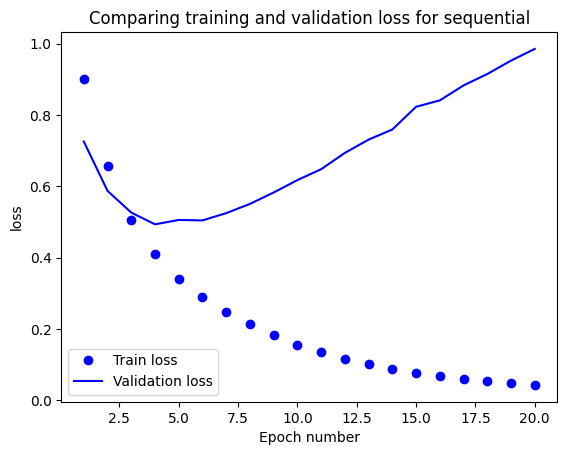

Epoch 1/4
26/26 [==============================] - 1s 52ms/step - loss: 0.1334 - accuracy: 0.9676
Epoch 2/4
26/26 [==============================] - 1s 47ms/step - loss: 0.0911 - accuracy: 0.9748
Epoch 3/4
26/26 [==============================] - 1s 49ms/step - loss: 0.0727 - accuracy: 0.9798
Epoch 4/4
46/46 [==============================] - 0s 3ms/step - loss: 1.0437 - accuracy: 0.7630

Test accuracy: 76.30%
46/46 [==============================] - 0s 3ms/step


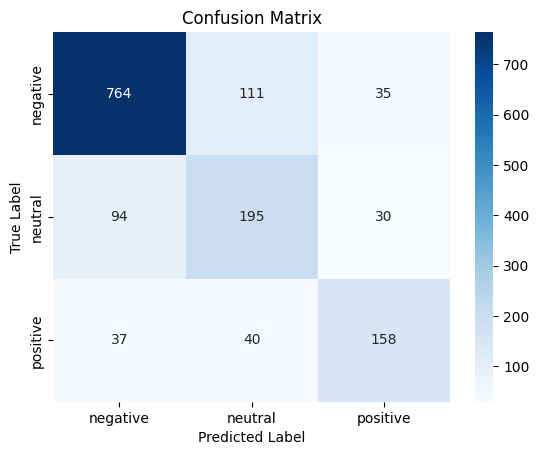

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(NB_WORDS,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))


base_history = deep_model(model, X_train_rest, y_train_rest, X_valid, y_valid)
base_min = optimal_epoch(base_history)


eval_metric(model, base_history, 'loss')

base_results = test_model(model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, base_min)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_oh)
cm = confusion_matrix(np.argmax(y_test_oh, axis=1), np.argmax(y_pred, axis=1))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(classification_report(np.argmax(y_test_oh, axis=1), np.argmax(y_pred, axis=1), target_names=classes))

              precision    recall  f1-score   support

    negative       0.84      0.90      0.87       910
     neutral       0.61      0.60      0.61       319
    positive       0.78      0.61      0.69       235

    accuracy                           0.79      1464
   macro avg       0.75      0.70      0.72      1464
weighted avg       0.78      0.79      0.78      1464



In [ ]:
reduced_model = Sequential()
reduced_model.add(Dense(16, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(Dense(3, activation='softmax'))
reduced_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 160,067
Trainable params: 160,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduced_history = deep_model(reduced_model, X_train_rest, y_train_rest, X_valid, y_valid)
reduced_min = optimal_epoch(reduced_history)

Epoch 1/20
24/24 [==============================] - 1s 42ms/step - loss: 0.9703 - accuracy: 0.6169 - val_loss: 0.8558 - val_accuracy: 0.6533
Epoch 2/20
24/24 [==============================] - 1s 31ms/step - loss: 0.8048 - accuracy: 0.6576 - val_loss: 0.7462 - val_accuracy: 0.6927
Epoch 3/20
24/24 [==============================] - 1s 31ms/step - loss: 0.7107 - accuracy: 0.6925 - val_loss: 0.6802 - val_accuracy: 0.7223
Epoch 4/20
24/24 [==============================] - 1s 29ms/step - loss: 0.6438 - accuracy: 0.7342 - val_loss: 0.6346 - val_accuracy: 0.7511
Epoch 5/20
24/24 [==============================] - 1s 32ms/step - loss: 0.5900 - accuracy: 0.7709 - val_loss: 0.5989 - val_accuracy: 0.7731
Epoch 6/20
24/24 [==============================] - 1s 31ms/step - loss: 0.5451 - accuracy: 0.8038 - val_loss: 0.5734 - val_accuracy: 0.7792
Epoch 7/20
24/24 [==============================] - 1s 31ms/step - loss: 0.5079 - accuracy: 0.8258 - val_loss: 0.5514 - val_accuracy: 0.7868
Epoch 8/20
24

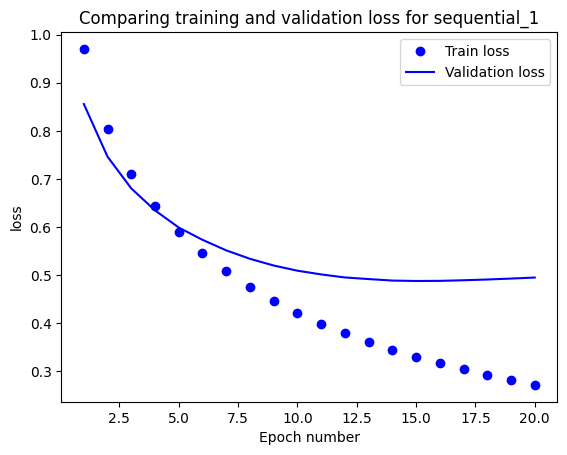

In [ ]:
eval_metric(reduced_model, reduced_history, 'loss')

In [ ]:
reduced_results = test_model(reduced_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, base_min)

Epoch 1/4
26/26 [==============================] - 1s 30ms/step - loss: 0.2852 - accuracy: 0.9011
Epoch 2/4
26/26 [==============================] - 1s 27ms/step - loss: 0.2742 - accuracy: 0.9055
Epoch 3/4
26/26 [==============================] - 1s 27ms/step - loss: 0.2642 - accuracy: 0.9095
Epoch 4/4
46/46 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7842

Test accuracy: 78.42%


In [ ]:
def compare_models_by_metric(model_1, model_2, model_hist_1, model_hist_2, metric):

    metric_model_1 = model_hist_1.history[metric]
    metric_model_2 = model_hist_2.history[metric]

    e = range(1, NB_START_EPOCHS + 1)
    
    metrics_dict = {
        'acc' : 'Training Accuracy',
        'loss' : 'Training Loss',
        'val_acc' : 'Validation accuracy',
        'val_loss' : 'Validation loss'
    }
    
    metric_label = metrics_dict[metric]

    plt.plot(e, metric_model_1, 'bo', label=model_1.name)
    plt.plot(e, metric_model_2, 'b', label=model_2.name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_label)
    plt.title('Comparing ' + metric_label + ' between models')
    plt.legend()
    plt.show()

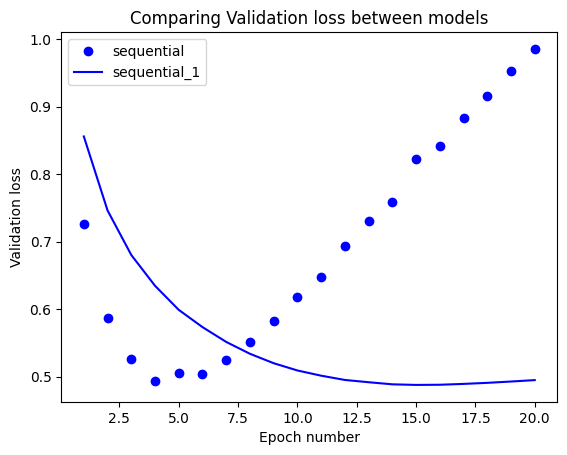

In [ ]:
compare_models_by_metric(model, reduced_model, base_history, reduced_history, 'val_loss')

46/46 [==============================] - 0s 3ms/step


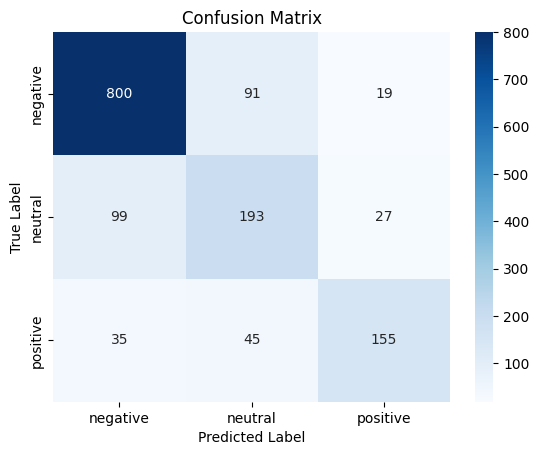

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = reduced_model.predict(X_test_oh)
cm = confusion_matrix(np.argmax(y_test_oh, axis=1), np.argmax(y_pred, axis=1))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print(classification_report(np.argmax(y_test_oh, axis=1), np.argmax(y_pred, axis=1), target_names=classes))

              precision    recall  f1-score   support

    negative       0.84      0.90      0.87       910
     neutral       0.61      0.60      0.61       319
    positive       0.78      0.61      0.69       235

    accuracy                           0.79      1464
   macro avg       0.75      0.70      0.72      1464
weighted avg       0.78      0.79      0.78      1464



In [ ]:
from keras import regularizers

In [ ]:
reg_model = Sequential()
reg_model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(Dense(3, activation='softmax'))
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                640064    
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reg_history = deep_model(reg_model, X_train_rest, y_train_rest, X_valid, y_valid)
reg_min = optimal_epoch(reg_history)

Epoch 1/20
24/24 [==============================] - 3s 84ms/step - loss: 1.0742 - accuracy: 0.6091 - val_loss: 0.8909 - val_accuracy: 0.6510
Epoch 2/20
24/24 [==============================] - 1s 52ms/step - loss: 0.8185 - accuracy: 0.7057 - val_loss: 0.7484 - val_accuracy: 0.7838
Epoch 3/20
24/24 [==============================] - 1s 51ms/step - loss: 0.6642 - accuracy: 0.8092 - val_loss: 0.6514 - val_accuracy: 0.7967
Epoch 4/20
24/24 [==============================] - 1s 51ms/step - loss: 0.5627 - accuracy: 0.8453 - val_loss: 0.6305 - val_accuracy: 0.7944
Epoch 5/20
24/24 [==============================] - 1s 49ms/step - loss: 0.4989 - accuracy: 0.8684 - val_loss: 0.6127 - val_accuracy: 0.8088
Epoch 6/20
24/24 [==============================] - 1s 49ms/step - loss: 0.4526 - accuracy: 0.8835 - val_loss: 0.6087 - val_accuracy: 0.7989
Epoch 7/20
24/24 [==============================] - 1s 51ms/step - loss: 0.4157 - accuracy: 0.8939 - val_loss: 0.6165 - val_accuracy: 0.7929
Epoch 8/20
24

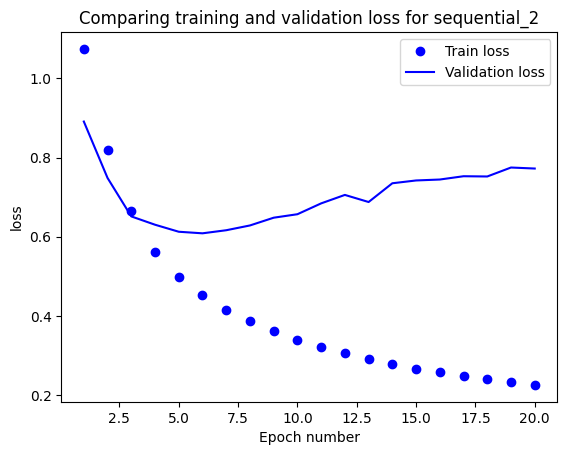

In [ ]:
eval_metric(reg_model, reg_history, 'loss')

In [ ]:
reg_results = test_model(reg_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, base_min)

Epoch 1/4
26/26 [==============================] - 1s 52ms/step - loss: 0.2773 - accuracy: 0.9484
Epoch 2/4
26/26 [==============================] - 1s 48ms/step - loss: 0.2504 - accuracy: 0.9571
Epoch 3/4
26/26 [==============================] - 1s 47ms/step - loss: 0.2375 - accuracy: 0.9616
Epoch 4/4
46/46 [==============================] - 0s 6ms/step - loss: 0.8226 - accuracy: 0.7760

Test accuracy: 77.60%


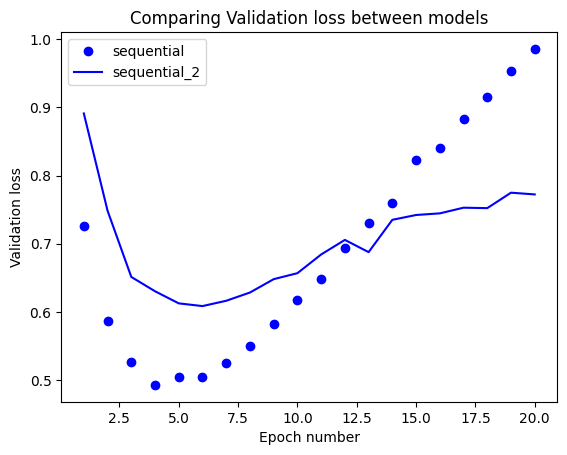

In [ ]:
compare_models_by_metric(model, reg_model, base_history, reg_history, 'val_loss')

46/46 [==============================] - 0s 6ms/step


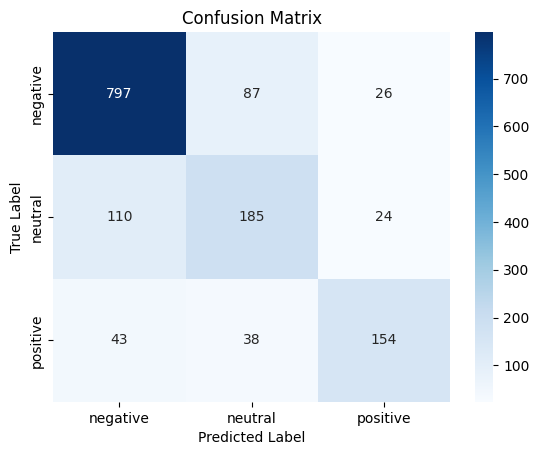

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = reg_model.predict(X_test_oh)
cm = confusion_matrix(np.argmax(y_test_oh, axis=1), np.argmax(y_pred, axis=1))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
drop_model = Sequential()
drop_model.add(Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(Dropout(0.5))
drop_model.add(Dense(64, activation='relu'))
drop_model.add(Dropout(0.5))
drop_model.add(Dense(3, activation='softmax'))
drop_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
drop_history = deep_model(drop_model, X_train_rest, y_train_rest, X_valid, y_valid)
drop_min = optimal_epoch(drop_history)

Epoch 1/20
24/24 [==============================] - 2s 66ms/step - loss: 0.8834 - accuracy: 0.6186 - val_loss: 0.7378 - val_accuracy: 0.6366
Epoch 2/20
24/24 [==============================] - 1s 52ms/step - loss: 0.7268 - accuracy: 0.6409 - val_loss: 0.6548 - val_accuracy: 0.7147
Epoch 3/20
24/24 [==============================] - 1s 52ms/step - loss: 0.6403 - accuracy: 0.7282 - val_loss: 0.5945 - val_accuracy: 0.7777
Epoch 4/20
24/24 [==============================] - 1s 54ms/step - loss: 0.5633 - accuracy: 0.7926 - val_loss: 0.5491 - val_accuracy: 0.8035
Epoch 5/20
24/24 [==============================] - 1s 53ms/step - loss: 0.4945 - accuracy: 0.8241 - val_loss: 0.5197 - val_accuracy: 0.8096
Epoch 6/20
24/24 [==============================] - 1s 52ms/step - loss: 0.4500 - accuracy: 0.8407 - val_loss: 0.5047 - val_accuracy: 0.7951
Epoch 7/20
24/24 [==============================] - 1s 51ms/step - loss: 0.4055 - accuracy: 0.8597 - val_loss: 0.4964 - val_accuracy: 0.7974
Epoch 8/20
24

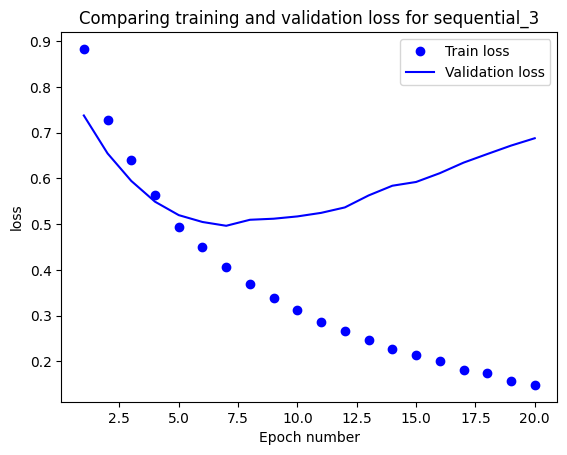

In [ ]:
eval_metric(drop_model, drop_history, 'loss')

In [ ]:
drop_results = test_model(drop_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, base_min)

Epoch 1/4
26/26 [==============================] - 1s 50ms/step - loss: 0.1996 - accuracy: 0.9382
Epoch 2/4
26/26 [==============================] - 1s 48ms/step - loss: 0.1853 - accuracy: 0.9423
Epoch 3/4
26/26 [==============================] - 1s 50ms/step - loss: 0.1682 - accuracy: 0.9452
Epoch 4/4
46/46 [==============================] - 0s 6ms/step - loss: 0.7983 - accuracy: 0.7807

Test accuracy: 78.07%


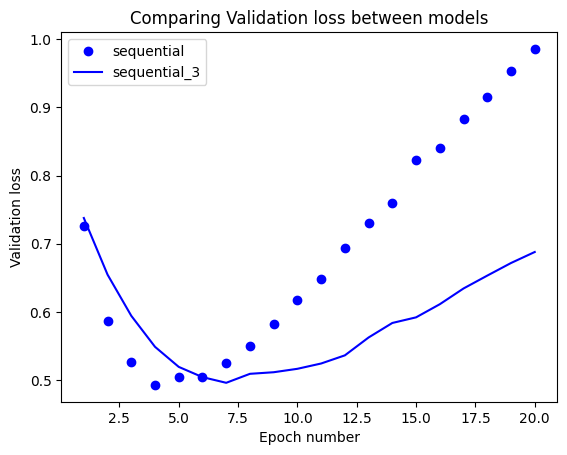

In [ ]:
compare_models_by_metric(model, drop_model, base_history, drop_history, 'val_loss')

46/46 [==============================] - 0s 5ms/step


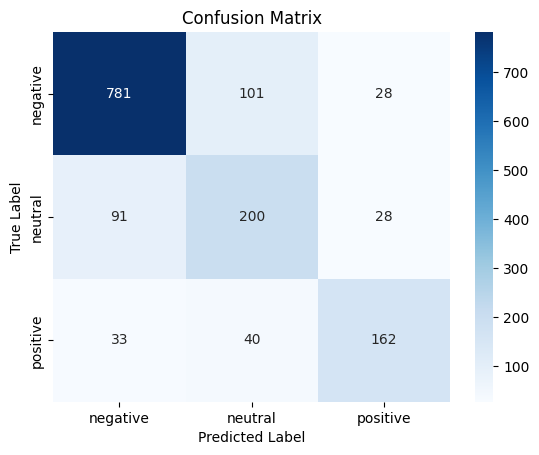

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = drop_model.predict(X_test_oh)
cm = confusion_matrix(np.argmax(y_test_oh, axis=1), np.argmax(y_pred, axis=1))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
reduce_dropout_model = Sequential()
reduce_dropout_model.add(Dense(16, activation='relu', input_shape=(NB_WORDS,)))
reduce_dropout_model.add(Dropout(0.5))
reduce_dropout_model.add(Dense(3, activation='softmax'))
reduce_dropout_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                160016    
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 51        
                                                                 
Total params: 160,067
Trainable params: 160,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduce_drop_history = deep_model(reduce_dropout_model, X_train_rest, y_train_rest, X_valid, y_valid)
reduce_drop_min = optimal_epoch(reduce_drop_history)

Epoch 1/20
24/24 [==============================] - 2s 45ms/step - loss: 0.9923 - accuracy: 0.6058 - val_loss: 0.8878 - val_accuracy: 0.6457
Epoch 2/20
24/24 [==============================] - 1s 32ms/step - loss: 0.8514 - accuracy: 0.6562 - val_loss: 0.7807 - val_accuracy: 0.6897
Epoch 3/20
24/24 [==============================] - 1s 33ms/step - loss: 0.7711 - accuracy: 0.6895 - val_loss: 0.7094 - val_accuracy: 0.7208
Epoch 4/20
24/24 [==============================] - 1s 29ms/step - loss: 0.7091 - accuracy: 0.7241 - val_loss: 0.6584 - val_accuracy: 0.7436
Epoch 5/20
24/24 [==============================] - 1s 31ms/step - loss: 0.6603 - accuracy: 0.7453 - val_loss: 0.6213 - val_accuracy: 0.7595
Epoch 6/20
24/24 [==============================] - 1s 30ms/step - loss: 0.6253 - accuracy: 0.7658 - val_loss: 0.5935 - val_accuracy: 0.7762
Epoch 7/20
24/24 [==============================] - 1s 30ms/step - loss: 0.5902 - accuracy: 0.7802 - val_loss: 0.5701 - val_accuracy: 0.7891
Epoch 8/20
24

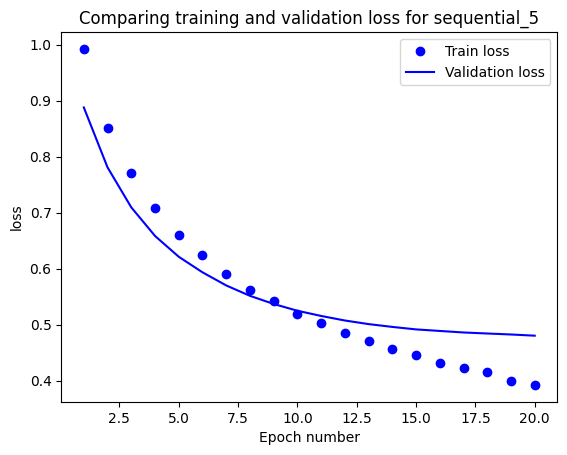

In [ ]:
eval_metric(reduce_dropout_model, reduce_drop_history, 'loss')

In [ ]:
reduce_dropout_results = test_model(reduce_dropout_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, base_min)


Epoch 1/4
26/26 [==============================] - 1s 30ms/step - loss: 0.4023 - accuracy: 0.8582
Epoch 2/4
26/26 [==============================] - 1s 28ms/step - loss: 0.3938 - accuracy: 0.8592
Epoch 3/4
26/26 [==============================] - 1s 27ms/step - loss: 0.3860 - accuracy: 0.8607
Epoch 4/4
46/46 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7848

Test accuracy: 78.48%


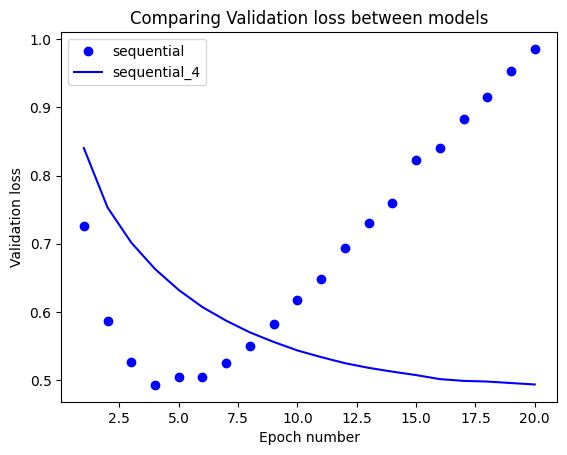

In [ ]:
compare_models_by_metric(model, reduce_dropout_model, base_history, reduce_drop_history, 'val_loss')

46/46 [==============================] - 0s 3ms/step


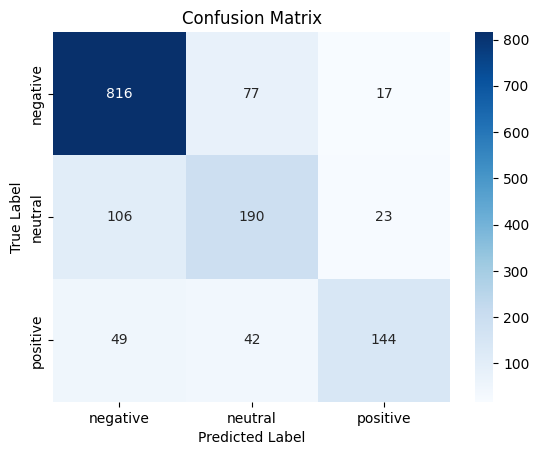

In [ ]:
y_pred = reduce_dropout_model.predict(X_test_oh)
cm = confusion_matrix(np.argmax(y_test_oh, axis=1), np.argmax(y_pred, axis=1))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()